**TASK 2: Explore supervised machine lerning- prediction of test score based on number of hours of study**

**Importing** **libraries**


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**dataset**

In [3]:
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory data analysis**

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


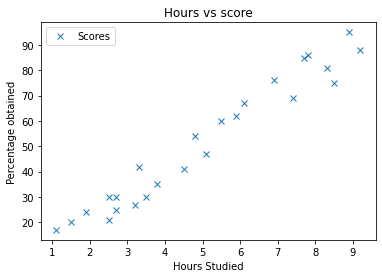

In [5]:
dataset.plot(x='Hours', y='Scores', style='x')
plt.title('Hours vs score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage obtained')
plt.show()

**Test and train datasets**

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear regression model**

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:

int=regressor.intercept_
coef=regressor.coef_
print("model result")
res=pd.DataFrame({'intercept': int, 'coefficient': coef})
res

model result


,intercept,coefficient
0,2.826892,9.682078


Text(0.5, 1.0, 'Total hours of study vs percentage')

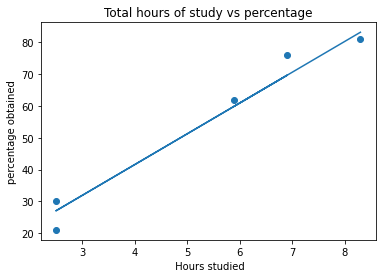

In [39]:
result=coef*X_test+int
plt.scatter(X_test,y_test)
plt.plot(X_test,result)
plt.xlabel(' Hours studied')
plt.ylabel('percentage obtained')
plt.title('Total hours of study vs percentage')

**Model prediction**

In [23]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


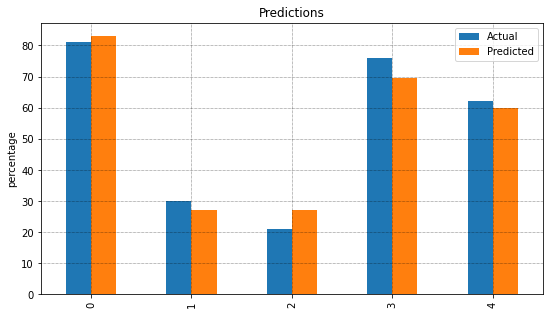

In [33]:
df.plot(kind='bar', figsize=(9,5))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('percentage')
plt.title('Predictions')
plt.show()

**Performance evaluation**

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


**Question:What will be predicted score if a student study for 9.25 hrs a day?** 

In [42]:
hours = [[9.25]]
new_pred = regressor.predict(hours)
print("the predicted score is: {}".format(new_pred))


the predicted score is: [92.38611528]
